In [ ]:
Portobello Tech is an app innovator that has devised an intelligent way of predicting employee turnover within 
the company. It periodically evaluates employees' work details including the number of projects they worked upon, 
average monthly working hours, time spent in the company, promotions in the last 5 years, and salary level.
Data from prior evaluations show the employee’s satisfaction at the workplace. The data could be used to identify 
patterns in work style and their interest to continue to work in the company. 
The HR Department owns the data and uses it to predict employee turnover. Employee turnover refers to the total 
number of workers who leave a company over a certain time period.

As the ML Developer assigned to the HR Department, you have been asked to create ML Programs to
1.	Perform data quality check by checking for missing values if any.
2.	Understand what factors contributed most to employee turnover by EDA.
3.	Perform clustering of Employees who left based on their satisfaction and evaluation.
4.	Handle the left Class Imbalance using SMOTE technique.
5.	Perform k-fold cross-validation model training and evaluate performance. 
6.	Identify the best model and justify the evaluation metrics used. 
7.	Suggest various retention strategies for targeted employees.


In [3]:
import pandas as pd
data=pd.read_excel('hr_sep.xlsx')
data.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [4]:
data.info

<bound method DataFrame.info of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2      

In [5]:
data.describe

<bound method NDFrame.describe of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2    

In [6]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [7]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

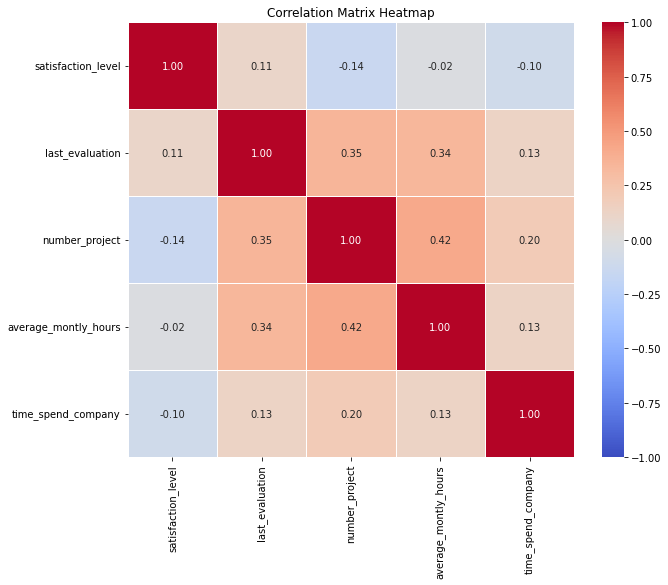

In [10]:
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project',
                     'average_montly_hours', 'time_spend_company']

# Creating a correlation matrix
correlation_matrix = data[numerical_features].corr()

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

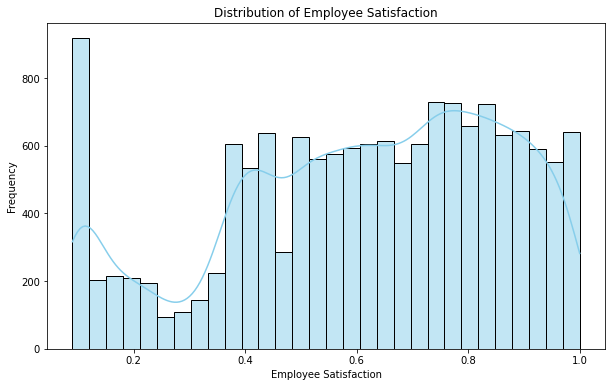

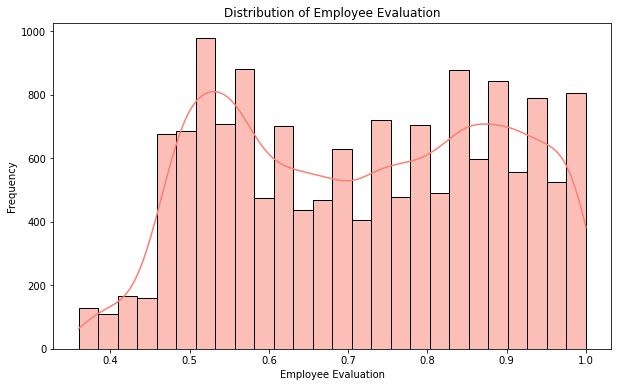

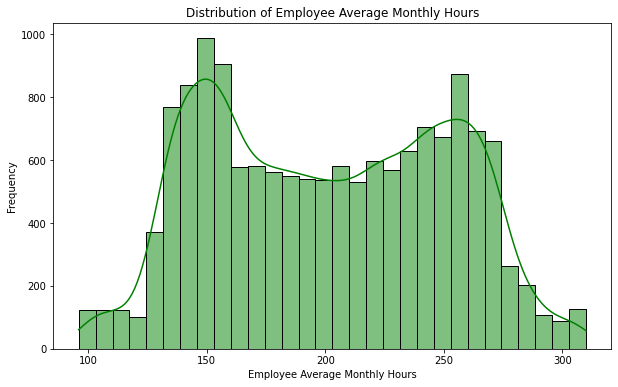

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data['satisfaction_level'], kde=True, color='skyblue')
plt.xlabel('Employee Satisfaction')
plt.ylabel('Frequency')
plt.title('Distribution of Employee Satisfaction')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['last_evaluation'], kde=True, color='salmon')
plt.xlabel('Employee Evaluation')
plt.ylabel('Frequency')
plt.title('Distribution of Employee Evaluation')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['average_montly_hours'], kde=True, color='green')
plt.xlabel('Employee Average Monthly Hours')
plt.ylabel('Frequency')
plt.title('Distribution of Employee Average Monthly Hours')
plt.show()

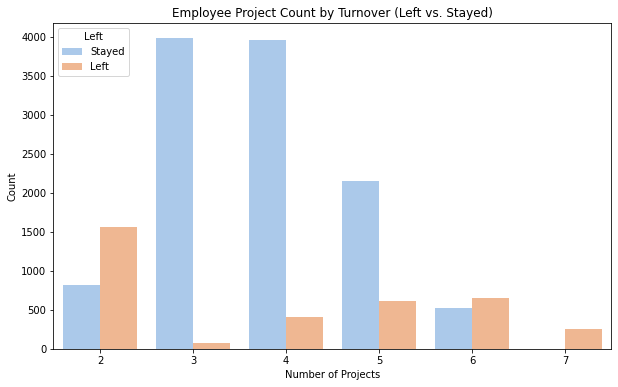

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='number_project', hue='left', palette='pastel')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.title('Employee Project Count by Turnover (Left vs. Stayed)')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Cluster Centers (means of satisfaction_level and last_evaluation) for Each Cluster:
   satisfaction_level  last_evaluation
0            0.391881         0.624949
1            0.780264         0.785174


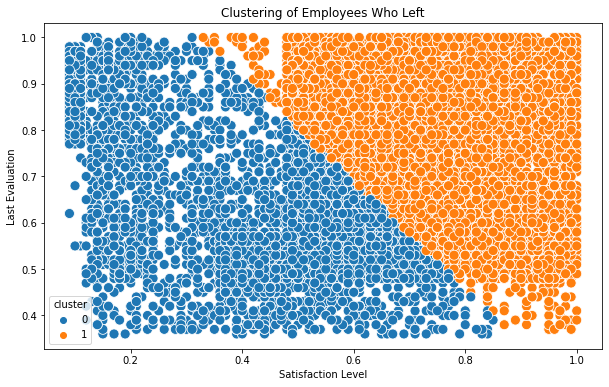

In [16]:
selected_columns = ['satisfaction_level', 'last_evaluation']
data_selected = data[selected_columns]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)
kmeans = KMeans(n_clusters=2, random_state=42)
data_selected['cluster'] = kmeans.fit_predict(data_scaled)
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=['satisfaction_level', 'last_evaluation'])
print("Cluster Centers (means of satisfaction_level and last_evaluation) for Each Cluster:")
print(cluster_centers)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', data=data_selected, palette='tab10', s=100)
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Clustering of Employees Who Left')
plt.show()

Cluster Centers (means of satisfaction_level and last_evaluation) for Each Cluster:
   satisfaction_level  last_evaluation
0            0.412304         0.517265
1            0.808031         0.916415
2            0.111321         0.870884


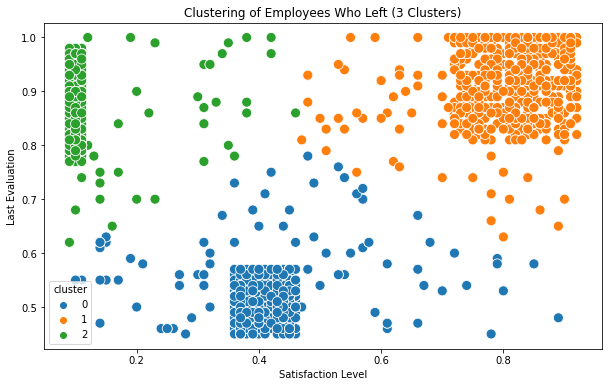

In [17]:
selected_columns = ['satisfaction_level', 'last_evaluation']
data_selected = data[data['left'] == 1][selected_columns]  # Filter data for employees who left
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)
kmeans = KMeans(n_clusters=3, random_state=42)
data_selected['cluster'] = kmeans.fit_predict(data_scaled)
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=['satisfaction_level', 'last_evaluation'])
print("Cluster Centers (means of satisfaction_level and last_evaluation) for Each Cluster:")
print(cluster_centers)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', data=data_selected, palette='tab10', s=100)
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Clustering of Employees Who Left (3 Clusters)')
plt.show()


In [ ]:
Cluster 0:

Mean Satisfaction Level: 0.412
Mean Last Evaluation: 0.517
Thoughts: Employees in this cluster have relatively low satisfaction levels and last evaluation scores. It is possible that these employees were 
experiencing some level of dissatisfaction with their work or the organization, which might have contributed to their decision to leave. The moderate
last evaluation scores suggest that their performance might have been average, but it wasn't enough to compensate for their dissatisfaction.
To improve retention in the future, it's essential for the organization to identify and address the factors that lead to lower satisfaction levels
among employees in this cluster.

Cluster 1:

Mean Satisfaction Level: 0.808
Mean Last Evaluation: 0.916
Thoughts: This cluster consists of employees with high satisfaction levels and excellent last evaluation scores. It is surprise to see that employees
with such positive work experiences still decided to leave the company. To retain top-performing and highly satisfied employees, it is crucial for 
the organization to understand the reasons for their departure. There could be external factors influencing their decision, such as better
opportunities elsewhere or personal reasons. To retain such high-performing employees, the company could consider conducting exit interviews and 
seeking feedback to identify any issues that might not be apparent through standard evaluations.

Cluster 2:

Mean Satisfaction Level: 0.111
Mean Last Evaluation: 0.870
Thoughts: This cluster represents employees with extremely low satisfaction levels and high last evaluation scores. The high last evaluation scores 
suggest that these employees might have been performing well in their roles despite their low satisfaction. The extremely low satisfaction levels 
might indicate that these employees were dissatisfied with their work environment, company culture, or other non-evaluation-related factors. 
Organizations should pay close attention to such employees and try to address any underlying issues that may contribute to their dissatisfaction. 
Proactive measures, such as employee engagement surveys, regular feedback sessions, and addressing workplace concerns, can help reduce turnover
within this cluster.

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE

In [21]:
categorical_columns = ['sales', 'salary']  # Add any other categorical columns if present
numeric_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
                   'time_spend_company', 'Work_accident', 'promotion_last_5years']
data_categorical = pd.get_dummies(data[categorical_columns], drop_first=True)
data_combined = pd.concat([data[numeric_columns], data_categorical], axis=1)
X = data_combined
y = data['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

In [24]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=42)
}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"Mean Accuracy: {scores.mean():.3f}")
    print(f"Standard Deviation of Accuracy: {scores.std():.3f}")

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("\n")


Training Logistic Regression...
Mean Accuracy: 0.793
Standard Deviation of Accuracy: 0.006
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2286
           1       0.59      0.37      0.45       714

    accuracy                           0.79      3000
   macro avg       0.71      0.64      0.66      3000
weighted avg       0.77      0.79      0.77      3000



Training Random Forest Classifier...
Mean Accuracy: 0.988
Standard Deviation of Accuracy: 0.003
Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2286
           1       0.99      0.98      0.99       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



Training Gradient Boosting Classifier...
Mean Accuracy: 

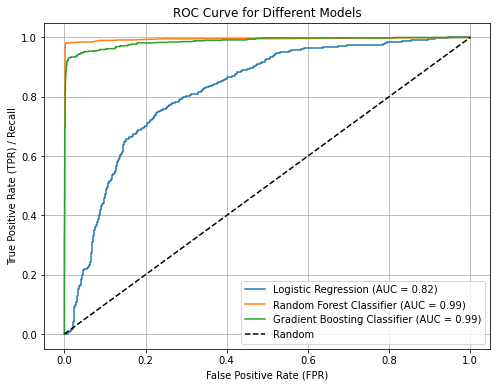

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

from sklearn.metrics import roc_auc_score, roc_curve
models = {
    'Logistic Regression': logreg_model,
    'Random Forest Classifier': rf_model,
    'Gradient Boosting Classifier': gb_model
}

plt.figure(figsize=(8, 6))
for model_name, model in models.items():
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) / Recall')
plt.title('ROC Curve for Different Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [30]:
from sklearn.metrics import confusion_matrix

for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model_name}:")
    print(cm)
    print("\n")


Confusion Matrix for Logistic Regression:
[[2107  179]
 [ 452  262]]


Confusion Matrix for Random Forest Classifier:
[[2281    5]
 [  15  699]]


Confusion Matrix for Gradient Boosting Classifier:
[[2261   25]
 [  49  665]]




In [ ]:
let's focus on the Recall (Sensitivity) and Precision metrics for each model:

Logistic Regression:

TP = 262
FP = 179
TN = 2107
FN = 452
Recall (Sensitivity) = TP / (TP + FN) = 262 / (262 + 452) ≈ 0.367 (36.7%)
Precision = TP / (TP + FP) = 262 / (262 + 179) ≈ 0.594 (59.4%)

Random Forest Classifier:

TP = 699
FP = 5
TN = 2281
FN = 15
Recall (Sensitivity) = TP / (TP + FN) = 699 / (699 + 15) ≈ 0.979 (97.9%)
Precision = TP / (TP + FP) = 699 / (699 + 5) ≈ 0.993 (99.3%)

Gradient Boosting Classifier:

TP = 665
FP = 25
TN = 2261
FN = 49
Recall (Sensitivity) = TP / (TP + FN) = 665 / (665 + 49) ≈ 0.931 (93.1%)
Precision = TP / (TP + FP) = 665 / (665 + 25) ≈ 0.964 (96.4%)

Interpretation:

Logistic Regression has relatively low recall (36.7%) compared to Random Forest Classifier (97.9%) and Gradient Boosting Classifier (93.1%). 
It may struggle in identifying employees who leave (class 1).
Random Forest Classifier shows excellent recall (97.9%) and precision (99.3%), indicating it is effective in correctly identifying both classes.
Gradient Boosting Classifier also performs well with high recall (93.1%) and precision (96.4%).
Based on these results, if the goal is to prioritize correctly identifying employees who leave (class 1), the Random Forest Classifier seems to be 
the best model due to its high recall. However, if you also need high precision to minimize false positives, the Gradient Boosting Classifier could
be a good option as it has a slightly higher precision than the Random Forest Classifier while maintaining a relatively high recall

In [31]:
y_pred_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
results_df = pd.DataFrame({'Actual': y_test, 'Predicted_Probability': y_pred_prob_rf})
def categorize_zone(probability_score):
    if probability_score < 0.2:
        return 'Safe Zone (Green)'
    elif 0.2 <= probability_score < 0.6:
        return 'Low Risk Zone (Yellow)'
    elif 0.6 <= probability_score < 0.9:
        return 'Medium Risk Zone (Orange)'
    else:
        return 'High Risk Zone (Red)'

results_df['Retention_Zone'] = results_df['Predicted_Probability'].apply(categorize_zone)
zone_counts = results_df['Retention_Zone'].value_counts()
print(zone_counts)

Safe Zone (Green)            2251
High Risk Zone (Red)          641
Medium Risk Zone (Orange)      61
Low Risk Zone (Yellow)         47
Name: Retention_Zone, dtype: int64


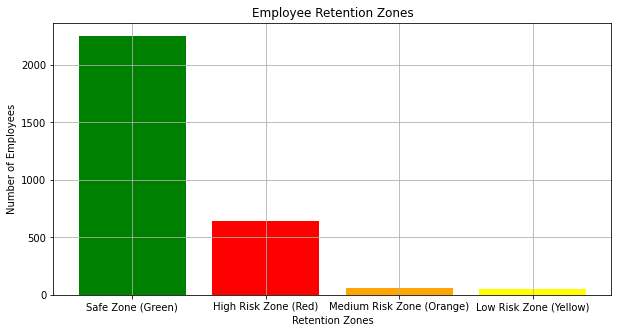

In [36]:
zones = ['Safe Zone (Green)', 'High Risk Zone (Red)', 'Medium Risk Zone (Orange)', 'Low Risk Zone (Yellow)']
counts = [2251, 641, 61, 47]
colors = ['green', 'red', 'orange', 'yellow']
plt.figure(figsize=(10, 5))
plt.bar(zones, counts, color=colors)
plt.xlabel('Retention Zones')
plt.ylabel('Number of Employees')
plt.title('Employee Retention Zones')
plt.grid(True)
plt.show()